# Team Data Brewers 


# Sentiment Analysis of Recipe Reviews

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##Importing Reuired Libraries

In [ ]:
import nltk  
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package basque_grammars is already up-to-date!
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Pac

True

In [ ]:
import os

#importing pandas module and numpy module for data preprocessing
import pandas as pd
import numpy as np

#importing matplotlib and seaborn for visualization
import matplotlib.pyplot as plt
import seaborn as sns

#to remove stopwords from  input data 
from nltk.corpus import stopwords

#Image result for python termcolor
#termcolor module is a python module for ANSII Color formatting for output in the terminal
from termcolor import colored

# to igonore the warning
from warnings import filterwarnings
filterwarnings('ignore')

# importing wordcloud for creating worldcloud of data
from wordcloud import WordCloud

#Using Sklearn library for machine learning models and to vectorize the input data
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn import model_selection, svm

##  Reading dataset

In [ ]:
m_review = pd.read_csv('/content/drive/MyDrive/hackathon/master review data.csv')
m_recipe = pd.read_csv('/content/drive/MyDrive/hackathon/master recipe data.csv')
sample = pd.read_csv('/content/drive/MyDrive/hackathon/Sample_Submission_CSV.csv')


print(m_review.shape,m_recipe.shape,sample.shape)

(21862, 3) (554, 33) (1, 2)


In [ ]:
m_review.head(10)

,RecipeId,ReviewText,SubmittedTime
0,d8ab10cd-6bdd-49f7-a169-adafc91a42bc,My family it they want me to make it again so...,04/28/2022
1,d8ab10cd-6bdd-49f7-a169-adafc91a42bc,"Was disappointed. Not as ""crispy"" as I though...",03/04/2022
2,d8ab10cd-6bdd-49f7-a169-adafc91a42bc,I am in Canada and have never seen a ranch dr...,03/01/2022
3,d8ab10cd-6bdd-49f7-a169-adafc91a42bc,Everybody loves this dish. So simple to make.d...,11/28/2021
4,d8ab10cd-6bdd-49f7-a169-adafc91a42bc,My family loved this chicken recipe...quick an...,11/20/2021
5,d8ab10cd-6bdd-49f7-a169-adafc91a42bc,My husband and I loved it! It was so easy! I ...,05/14/2021
6,d8ab10cd-6bdd-49f7-a169-adafc91a42bc,We loved this recipe. It was super easy and ta...,03/05/2021
7,d8ab10cd-6bdd-49f7-a169-adafc91a42bc,My husband loved this chicken. I would sugges...,03/04/2021
8,d8ab10cd-6bdd-49f7-a169-adafc91a42bc,it was good. I would do it again.it was moist...,03/04/2021
9,d8ab10cd-6bdd-49f7-a169-adafc91a42bc,This recipe was not a keeper. I used the reci...,01/14/2021


In [ ]:
m_review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21862 entries, 0 to 21861
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   RecipeId       21862 non-null  object
 1   ReviewText     21862 non-null  object
 2   SubmittedTime  21862 non-null  object
dtypes: object(3)
memory usage: 512.5+ KB


##Data Cleaning 

In [ ]:
#This is just for clear explanation. We can do all this in very small number of steps. And surely within a single funtion with very less computational complexity

'''  created the functions
        to tokenize, 
        removal of stop_words ,
        to normalize the data,
        to remove of garbage values i.e "~`!@#$%^&*()_-+={[}]|\:;'<,>.?/<br>" 
        from the input data'''

def tokenize_data(dataset):
  tokenizer = nltk.tokenize.TreebankWordTokenizer()
  
  for i in range(dataset.shape[0]): 
    dataset["ReviewText"][i] = tokenizer.tokenize(dataset["ReviewText"][i])
  return dataset

def remove_stop_words(dataset):
  stop_words = set(stopwords.words('english'))
  
  for i in range(dataset.shape[0]):
    dataset["ReviewText"][i] = ([token.lower() for token in dataset["ReviewText"][i] if token not in stop_words])
  return dataset

def normalize(dataset):
  lemmatizer = nltk.stem.WordNetLemmatizer() 

  for i in range(dataset.shape[0]):
    dataset.ReviewText[i] = " ".join([lemmatizer.lemmatize(token) for token in dataset.ReviewText[i]]).strip()
  return dataset

def remove_garbage(dataset):
    garbage = "~`!@#$%^&*()_-+={[}]|\:;'<,>.?/<br>"
    for i in range(dataset.shape[0]):
      dataset.ReviewText[i] = "".join([char for char in dataset.ReviewText[i] if char not in garbage])
    return dataset

In [ ]:
m_review = tokenize_data(m_review)
m_review = remove_stop_words(m_review)
m_review = normalize(m_review)
m_review = remove_garbage(m_review)


In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [ ]:
sia= SentimentIntensityAnalyzer()

In [ ]:
#for testing VADER 
a = 'wow, i have not tried anything amazing like this.'
print(sia.polarity_scores(a))
#OUTPUT-{'neg': 0.0, 'neu': 0.508, 'pos': 0.492, 'compound': 0.4404}

b = 'Sooo SAD I i wish i have not tried this food'
print(sia.polarity_scores(b))
#OUTPUT-{'neg': 0.0, 'neu': 0.425, 'pos': 0.575, 'compound': 0.8877}

{'neg': 0.214, 'neu': 0.348, 'pos': 0.438, 'compound': 0.4986}
{'neg': 0.306, 'neu': 0.479, 'pos': 0.215, 'compound': -0.2808}


In [ ]:
m_review['scores'] =m_review['ReviewText'].apply(lambda ReviewText: sia.polarity_scores(ReviewText))

m_review.head()

,RecipeId,ReviewText,SubmittedTime,scores
0,d8ab10cd-6bdd-49f7-a169-adafc91a42bc,my family want make i put ecipe ook anothe time,04/28/2022,"{'neg': 0.0, 'neu': 0.86, 'pos': 0.14, 'compou..."
1,d8ab10cd-6bdd-49f7-a169-adafc91a42bc,wa disappointed not cispy i thought would,03/04/2022,"{'neg': 0.383, 'neu': 0.617, 'pos': 0.0, 'comp..."
2,d8ab10cd-6bdd-49f7-a169-adafc91a42bc,i canada neve seen anch dessing mix sustitute,03/01/2022,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
3,d8ab10cd-6bdd-49f7-a169-adafc91a42bc,eveyody love dish so simple makedoes take long...,11/28/2021,"{'neg': 0.0, 'neu': 0.656, 'pos': 0.344, 'comp..."
4,d8ab10cd-6bdd-49f7-a169-adafc91a42bc,my family loved chicken ecipe quick easy,11/20/2021,"{'neg': 0.0, 'neu': 0.424, 'pos': 0.576, 'comp..."


In [ ]:
m_review['compound'] = m_review['scores'].apply(lambda score_dict: score_dict['compound'])

###On the basis of compound score we are creating ratings between 1 to 5

In [ ]:
i = 0

Rating = [ ]

while(i<len(m_review)):
    if ((m_review.iloc[i]['compound'] >= 0.8)):  # from 0-0.8 rating =5
        Rating.append('5')
        i = i+1
    elif ((m_review.iloc[i]['compound'] <= 0.7) & (m_review.iloc[i]['compound'] > 0.5)):
        Rating.append('4')
        i = i+1    # from 0.5 to 0.7 rating = 4
 
    elif ((m_review.iloc[i]['compound'] <= 0.5) & (m_review.iloc[i]['compound'] > 0.0)):
        Rating.append('3')
        i = i+1   # from 0.0 to 0.5 rating = 3

    elif ((m_review.iloc[i]['compound']  >= -0.2) & (m_review.iloc[i]['compound'] < 0.0)):
        Rating.append('2')  # from -0.2 to 0.0 rating = 2
        i = i+1
    else: 
      ((m_review.iloc[i]['compound'] <= -0.2))
      Rating.append('1')   # for less than 0.5 rating = 1
      i = i+1

In [ ]:
m_review['Rating']= Rating

on the basis of 

In [ ]:
i = 0

vader_sentiment = [ ]

while(i<len(m_review)):
    if ((m_review.iloc[i]['compound'] >= 0.5)):
        vader_sentiment.append('positive')
        i = i+1
    elif ((m_review.iloc[i]['compound'] > -0.5) & (m_review.iloc[i]['compound'] < 0.5)):
        vader_sentiment.append('neutral')
        i = i+1
    else: 
      ((m_review.iloc[i]['compound'] <= -0.5))
      vader_sentiment.append('negative')
      i = i+1

In [ ]:
#m_review['Rating']= Rating
m_review['Sentiment'] = vader_sentiment
m_review

,RecipeId,ReviewText,SubmittedTime,scores,compound,Rating,Sentiment
0,d8ab10cd-6bdd-49f7-a169-adafc91a42bc,my family want make i put ecipe ook anothe time,04/28/2022,"{'neg': 0.0, 'neu': 0.86, 'pos': 0.14, 'compou...",0.0772,3,neutral
1,d8ab10cd-6bdd-49f7-a169-adafc91a42bc,wa disappointed not cispy i thought would,03/04/2022,"{'neg': 0.383, 'neu': 0.617, 'pos': 0.0, 'comp...",-0.4767,1,neutral
2,d8ab10cd-6bdd-49f7-a169-adafc91a42bc,i canada neve seen anch dessing mix sustitute,03/01/2022,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,1,neutral
3,d8ab10cd-6bdd-49f7-a169-adafc91a42bc,eveyody love dish so simple makedoes take long...,11/28/2021,"{'neg': 0.0, 'neu': 0.656, 'pos': 0.344, 'comp...",0.6369,4,positive
4,d8ab10cd-6bdd-49f7-a169-adafc91a42bc,my family loved chicken ecipe quick easy,11/20/2021,"{'neg': 0.0, 'neu': 0.424, 'pos': 0.576, 'comp...",0.7783,1,positive
...,...,...,...,...,...,...,...
21857,3cedf120-1b21-426c-ae1e-6171ff84ddfc-z,good concept nt wok hoped i used igge pan way ...,05/31/2012,"{'neg': 0.0, 'neu': 0.733, 'pos': 0.267, 'comp...",0.7906,1,positive
21858,3cedf120-1b21-426c-ae1e-6171ff84ddfc-z,my family loved had toule cooking 35 min i us...,05/30/2012,"{'neg': 0.0, 'neu': 0.538, 'pos': 0.462, 'comp...",0.9169,5,positive
21859,3cedf120-1b21-426c-ae1e-6171ff84ddfc-z,i nt use iscuit still took foeve ake i issue t...,05/10/2012,"{'neg': 0.0, 'neu': 0.897, 'pos': 0.103, 'comp...",0.5423,4,positive
21860,3cedf120-1b21-426c-ae1e-6171ff84ddfc-z,too many oll ovewhelmed ecipe todoughy also t...,05/03/2012,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,1,neutral


In [ ]:
recipe_level=m_review.drop(['ReviewText','scores','compound'],axis=1)

In [ ]:
recipe_level

,RecipeId,SubmittedTime,Rating,Sentiment
0,d8ab10cd-6bdd-49f7-a169-adafc91a42bc,04/28/2022,3,neutral
1,d8ab10cd-6bdd-49f7-a169-adafc91a42bc,03/04/2022,1,neutral
2,d8ab10cd-6bdd-49f7-a169-adafc91a42bc,03/01/2022,1,neutral
3,d8ab10cd-6bdd-49f7-a169-adafc91a42bc,11/28/2021,4,positive
4,d8ab10cd-6bdd-49f7-a169-adafc91a42bc,11/20/2021,1,positive
...,...,...,...,...
21857,3cedf120-1b21-426c-ae1e-6171ff84ddfc-z,05/31/2012,1,positive
21858,3cedf120-1b21-426c-ae1e-6171ff84ddfc-z,05/30/2012,5,positive
21859,3cedf120-1b21-426c-ae1e-6171ff84ddfc-z,05/10/2012,4,positive
21860,3cedf120-1b21-426c-ae1e-6171ff84ddfc-z,05/03/2012,1,neutral


In [ ]:
recipe_level['SubmittedTime']=pd.to_datetime(recipe_level['SubmittedTime'])

In [ ]:
groupedby_time= recipe_level.groupby(['RecipeId','SubmittedTime'])['Rating'].agg(pd.Series.mode).to_frame()

In [ ]:
groupedby_time.head(50)

Rating
RecipeId                             SubmittedTime       
0007d1ab-a3d2-4f10-b426-8684d17096ca 2016-10-06         5
                                     2016-10-08         1
                                     2016-10-10         3
                                     2016-10-11         3
                                     2016-10-13         3
                                     2016-10-20         4
                                     2016-10-23         1
                                     2016-11-30         3
                                     2017-02-27         4
                                     2017-03-24         3
                                     2017-09-06         1
                                     2017-09-07         5
                                     2017-09-13         3
                                     2018-08-16         5
                                     2018-08-23         3
                                     2018-10-04         3
                                     2018-11-04         3
                                     2018-11-27         5
                                     2018-11-29         1
                                     2018-12-03         1
                                     2018-12-08         5
                                     2019-01-14         3
                                     2019-03-17         5
                                     2019-04-09         3
                                     2019-09-14         3
                                     2019-09-30         1
                                     2019-11-06         5
                                     2019-12-17         1
                                     2020-01-21         1
                                     2020-04-11         1
                                     2020-10-15         4
                                     2020-10-18         1
                                     2020-10-19         5
                                     2020-12-14         1
                                     2020-12-22         5
                                     2021-01-28         5
                                     2021-01-30         1
                                     2021-02-03         4
                                     2021-04-08         4
                                     2021-08-27         1
                                     2021-11-18         1
                                     2022-02-01         3
                                     2022-04-08         1
                                     2022-05-19         1
0096d87f-182d-4b0c-a43d-b88c82036a3b 2009-08-07         1
                                     2009-08-17         3
                                     2009-09-17         3
                                     2010-04-02         1
                                     2010-10-31         4
                                     2011-05-11         1

In [ ]:
groupedby_time1=groupedby_time.groupby(['RecipeId'])['Rating'].agg(pd.Series.mode).to_frame()

In [ ]:
groupedby_time1

,Rating
RecipeId,
0007d1ab-a3d2-4f10-b426-8684d17096ca,1
0096d87f-182d-4b0c-a43d-b88c82036a3b,1
009981eb-e2a2-48d3-a548-c7afca34f2f3,5
00c780c8-2b75-433b-b104-6f45ef76aebe,1
00dda8fc-7206-41bf-bc2c-eb211984d84f,5
...,...
fe12a5fa-e5ef-4ac3-8c3d-eeb4d68b8811,1
fe2fabfe-bb08-418a-85bf-3c1cd62aef53,1
fea6458e-42f9-4f1c-ae94-2585012b1011,1


In [ ]:
#group= recipe_level.groupby(['RecipeId'])['Rating'].agg(pd.Series.mode).to_frame()
group= groupedby_time1.explode('Rating')

In [ ]:
group

,Rating
RecipeId,
0007d1ab-a3d2-4f10-b426-8684d17096ca,1
0096d87f-182d-4b0c-a43d-b88c82036a3b,1
009981eb-e2a2-48d3-a548-c7afca34f2f3,5
00c780c8-2b75-433b-b104-6f45ef76aebe,1
00dda8fc-7206-41bf-bc2c-eb211984d84f,5
...,...
fe12a5fa-e5ef-4ac3-8c3d-eeb4d68b8811,1
fe2fabfe-bb08-418a-85bf-3c1cd62aef53,1
fea6458e-42f9-4f1c-ae94-2585012b1011,1


In [ ]:
group.to_csv('Rating_at_Recipe_level.csv')

In [ ]:
#d=group.drop_duplicates(keep=False)

In [ ]:
group

,Rating
RecipeId,
0007d1ab-a3d2-4f10-b426-8684d17096ca,1
0096d87f-182d-4b0c-a43d-b88c82036a3b,1
009981eb-e2a2-48d3-a548-c7afca34f2f3,5
00c780c8-2b75-433b-b104-6f45ef76aebe,1
00dda8fc-7206-41bf-bc2c-eb211984d84f,5
...,...
fe12a5fa-e5ef-4ac3-8c3d-eeb4d68b8811,1
fe2fabfe-bb08-418a-85bf-3c1cd62aef53,1
fea6458e-42f9-4f1c-ae94-2585012b1011,1


Major theme 

In [ ]:
#group = group.drop_duplicates(subset=['RecipeID','Rating'],keep='first', inplace=True, ignore_index=False)

In [ ]:
#group=group.groupby(['RecipeId','Rating']).size().reset_index().rename(columns={0:'Rating Count'})

##Trend analysis

In [ ]:
trend=m_review.drop(['RecipeId','ReviewText','scores','compound'],axis=1)

In [ ]:
trend['SubmittedTime']=pd.to_datetime(trend['SubmittedTime'])

In [ ]:
trend

,SubmittedTime,Rating
0,2022-04-28,3
1,2022-03-04,1
2,2022-03-01,1
3,2021-11-28,4
4,2021-11-20,1
...,...,...
21857,2012-05-31,1
21858,2012-05-30,5
21859,2012-05-10,4
21860,2012-05-03,1


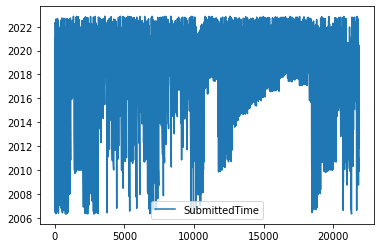

In [ ]:
trend.plot()

# New Section

In [ ]:
pip install https://github.com/ydataai/pandas-profiling/archive/master.zip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached https://github.com/ydataai/pandas-profiling/archive/master.zip


In [ ]:
from pandas_profiling import ProfileReport

In [ ]:
profile = ProfileReport(m_recipe, title="Pandas Profiling Report")

In [ ]:
profile.to_file("Master_Recipe.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
#Master_Recipe_EDA :file:///C:/Users/admin/Downloads/Master_Recipe.html

[link text](file:///C:/Users/admin/Downloads/Master_Recipe.html)

In [ ]:
final_df = pd.merge(m_recipe, group, on="RecipeId")

In [ ]:
final_df

,RecipeId,RecipeName,Introduction,NumberOfIngredients,TotalTime,Calories,Meal_Type,Dish_Type,Flavor,Cuisine,...,ingredient_text_15,ingredient_text_16,ingredient_text_17,ingredient_text_18,ingredient_text_19,ingredient_text_20,ingredient_text_21,ingredient_text_22,ingredient_text_23,Rating
0,0007d1ab-a3d2-4f10-b426-8684d17096ca,Cheesy Chicken and Sweet Potato Casserole,This casserole takes comfort food to a whole n...,9,2 hr 30 min,670.0,Entree~Dinner,Casserole,Savory,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,0096d87f-182d-4b0c-a43d-b88c82036a3b,Stuffed Chicken Breasts Cordon Bleu,Baked chicken cordon bleu has a fancy reputati...,5,45 min,400.0,Entree~Dinner,NaN,Savory,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,009981eb-e2a2-48d3-a548-c7afca34f2f3,Jumbo Burger Cups,Try a biscuit cup filled with burger fixin's ...,12,60 min,NaN,Entree~Dinner,Sandwich & Wrap,Savory,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
3,00c780c8-2b75-433b-b104-6f45ef76aebe,Beef Taquito Casserole,Frozen beef taquitos are the perfect topper fo...,8,50 min,450.0,Entree~Dinner,Casserole,Savory,Southwestern,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
4,00dda8fc-7206-41bf-bc2c-eb211984d84f,Shepherd's Pie,Wondering how to make Shepherd's Pie? Our vers...,10,60 min,350.0,Entree~Dinner,Casserole,Savory,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,fe2fabfe-bb08-418a-85bf-3c1cd62aef53,Chocolate Pecan Bars,These bars went overboard on gooeyness topped ...,9,2 hr 15 min,290.0,Dessert,Bar~Desserts & Treats,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
607,fea6458e-42f9-4f1c-ae94-2585012b1011,Buffalo Chicken Crescent Puffs,A spicy chicken and cheese filling mixture is ...,8,1 hr 10 min,130.0,Appetizer,NaN,Savory~Spicy,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
608,fef45bfb-8380-41ce-b9dc-998249211e7c,Savory Chicken Pot Pie,Pillsbury refrigerated pie crusts make a delic...,4,40 min,610.0,Entree~Dinner,Pot Pie~Casserole~Pie,Savory,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
609,ff8c6758-0958-4e4f-a9cd-6edd413904b4,Ranch Crack Dip,Ranch Crack Dip will be your new go-to dish fo...,6,10 min,200.0,Appetizer,Dip,Savory,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


In [ ]:
final_df=final_df.drop_duplicates(keep=False)

In [ ]:
final_df

,RecipeId,RecipeName,Introduction,NumberOfIngredients,TotalTime,Calories,Meal_Type,Dish_Type,Flavor,Cuisine,...,ingredient_text_15,ingredient_text_16,ingredient_text_17,ingredient_text_18,ingredient_text_19,ingredient_text_20,ingredient_text_21,ingredient_text_22,ingredient_text_23,Rating
0,0007d1ab-a3d2-4f10-b426-8684d17096ca,Cheesy Chicken and Sweet Potato Casserole,This casserole takes comfort food to a whole n...,9,2 hr 30 min,670.0,Entree~Dinner,Casserole,Savory,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,0096d87f-182d-4b0c-a43d-b88c82036a3b,Stuffed Chicken Breasts Cordon Bleu,Baked chicken cordon bleu has a fancy reputati...,5,45 min,400.0,Entree~Dinner,NaN,Savory,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,009981eb-e2a2-48d3-a548-c7afca34f2f3,Jumbo Burger Cups,Try a biscuit cup filled with burger fixin's ...,12,60 min,NaN,Entree~Dinner,Sandwich & Wrap,Savory,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
3,00c780c8-2b75-433b-b104-6f45ef76aebe,Beef Taquito Casserole,Frozen beef taquitos are the perfect topper fo...,8,50 min,450.0,Entree~Dinner,Casserole,Savory,Southwestern,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
4,00dda8fc-7206-41bf-bc2c-eb211984d84f,Shepherd's Pie,Wondering how to make Shepherd's Pie? Our vers...,10,60 min,350.0,Entree~Dinner,Casserole,Savory,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
604,fdad0859-2606-4553-a2e4-335818c04bc8,Easy Cherry Pie,It's time to simplify your cherry pie prep. Ma...,4,1 hr 10 min,380.0,Dessert,Pie,Sweet,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
605,fe12a5fa-e5ef-4ac3-8c3d-eeb4d68b8811,Apple Pie Breakfast Bake,Apple pie for breakfast? Yes please. Prep thi...,7,1 hr 55 min,710.0,Breakfast~Brunch,Casserole,Sweet,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
606,fe2fabfe-bb08-418a-85bf-3c1cd62aef53,Chocolate Pecan Bars,These bars went overboard on gooeyness topped ...,9,2 hr 15 min,290.0,Dessert,Bar~Desserts & Treats,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
607,fea6458e-42f9-4f1c-ae94-2585012b1011,Buffalo Chicken Crescent Puffs,A spicy chicken and cheese filling mixture is ...,8,1 hr 10 min,130.0,Appetizer,NaN,Savory~Spicy,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


In [ ]:
profile1 = ProfileReport(final_df, title="Pandas Profiling Report")

In [ ]:
profile1.to_file("Final_df.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]